In [1]:
#All imputs are placed here
import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.mixture import GaussianMixture as GMM

from six import StringIO
from IPython.display import Image
import pydotplus
import matplotlib.pyplot as plt

# Get to know your data

In [2]:
df = pd.read_csv('diabetes.csv')
# full data set
print(df.describe())
df.head()

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# Describe for all them without diabetes
dfNoDiabetes = df.loc[df['Outcome']== 0.0]
print(dfNoDiabetes.describe())

       Pregnancies   Glucose  BloodPressure  SkinThickness     Insulin  \
count   500.000000  500.0000     500.000000     500.000000  500.000000   
mean      3.298000  109.9800      68.184000      19.664000   68.792000   
std       3.017185   26.1412      18.063075      14.889947   98.865289   
min       0.000000    0.0000       0.000000       0.000000    0.000000   
25%       1.000000   93.0000      62.000000       0.000000    0.000000   
50%       2.000000  107.0000      70.000000      21.000000   39.000000   
75%       5.000000  125.0000      78.000000      31.000000  105.000000   
max      13.000000  197.0000     122.000000      60.000000  744.000000   

              BMI  DiabetesPedigreeFunction         Age  Outcome  
count  500.000000                500.000000  500.000000    500.0  
mean    30.304200                  0.429734   31.190000      0.0  
std      7.689855                  0.299085   11.667655      0.0  
min      0.000000                  0.078000   21.000000      0.0 

In [4]:
# describe for all them with diabetes
dfNoDiabetes = df.loc[df['Outcome']== 1.0]
print(dfNoDiabetes.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   268.000000  268.000000     268.000000     268.000000  268.000000   
mean      4.865672  141.257463      70.824627      22.164179  100.335821   
std       3.741239   31.939622      21.491812      17.679711  138.689125   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.750000  119.000000      66.000000       0.000000    0.000000   
50%       4.000000  140.000000      74.000000      27.000000    0.000000   
75%       8.000000  167.000000      82.000000      36.000000  167.250000   
max      17.000000  199.000000     114.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age  Outcome  
count  268.000000                268.000000  268.000000    268.0  
mean    35.142537                  0.550500   37.067164      1.0  
std      7.262967                  0.372354   10.968254      0.0  
min      0.000000                  0.088000   2

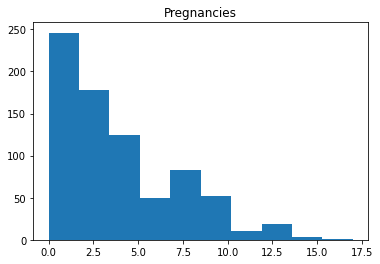

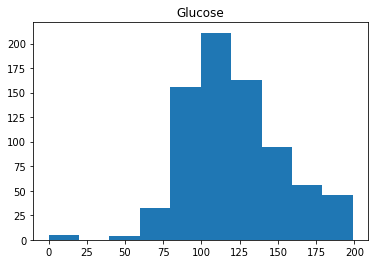

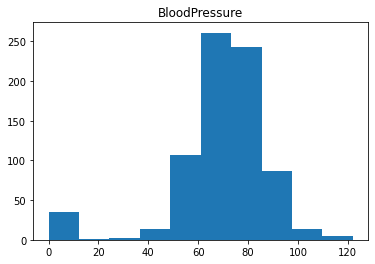

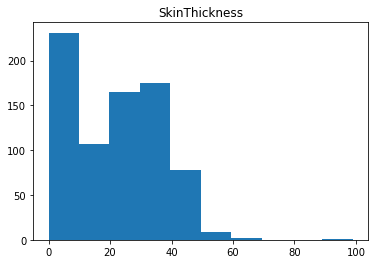

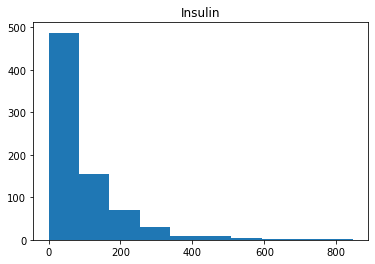

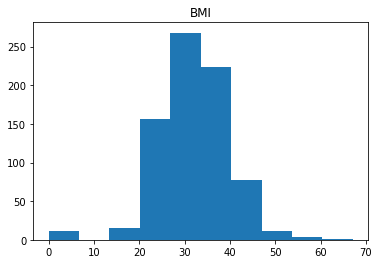

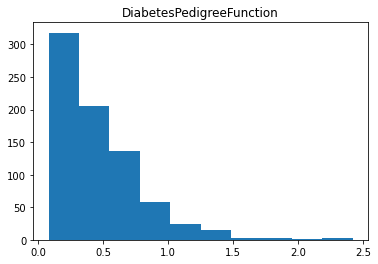

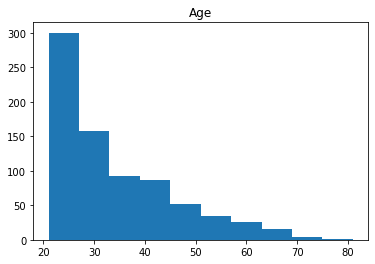

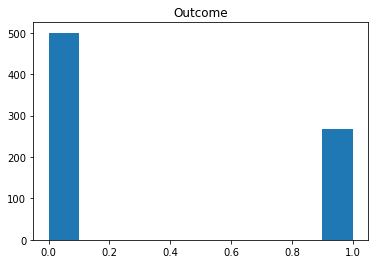

In [5]:
for (columnName, columnData) in df.iteritems():
    plt.title(columnName)
    plt.hist(columnData, bins=10)
    plt.show()

# PreProcessing

In [6]:
#The data set dimentions before preProcessing
print("Dataset dimentions : {}".format(df.shape)) 

Dataset dimentions : (768, 9)


In [7]:
delete_index = []

#Count counts the number of datapoints where both Blood pressure, Skin thickness and insulin is 0
count = 0
for i in range(len(df)):
    if df.iloc[i]['BloodPressure'] == 0:
        if df.iloc[i]['SkinThickness'] == 0:
            if df.iloc[i]['Insulin'] == 0:
                count += 1
                delete_index.append(i)

print(count)

33


In [8]:
for inx in range(len(delete_index)):
    df = df.drop(delete_index[inx])

print(df.shape)

(735, 9)


In [9]:
#Print for a column, the number of rows where the value of that column is 0
print('Blood Pressure: ', df[df.BloodPressure == 0].shape[0])
print('Glucose: ', df[df.Glucose == 0].shape[0])
print('Skin Thickness: ', df[df.SkinThickness == 0].shape[0])
print('Insulin: ', df[df.Insulin == 0].shape[0])
print('BMI: ', df[df.BMI == 0].shape[0])

Blood Pressure:  2
Glucose:  5
Skin Thickness:  194
Insulin:  341
BMI:  4


In [10]:
#Deletion of bloodpressure, glucose and BMI where the values are 0
mod_df = df[(df.BloodPressure != 0) & (df.Glucose != 0) & (df.BMI != 0)]
print(mod_df.shape)

(724, 9)


# Decision Tree

In [11]:
features = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]
feature = mod_df[features] #Setting features
target = mod_df.Outcome #Setting target variable

In [12]:
feature_train, feature_test, target_train, target_test = train_test_split(feature, target, test_size=0.3, random_state=42)

In [13]:
tree = DecisionTreeClassifier(max_depth=4)
tree = tree.fit(feature_train, target_train)

y_pred = tree.predict(feature_test)

print("Accurancy: ", metrics.accuracy_score(target_test, y_pred))

Accurancy:  0.7660550458715596


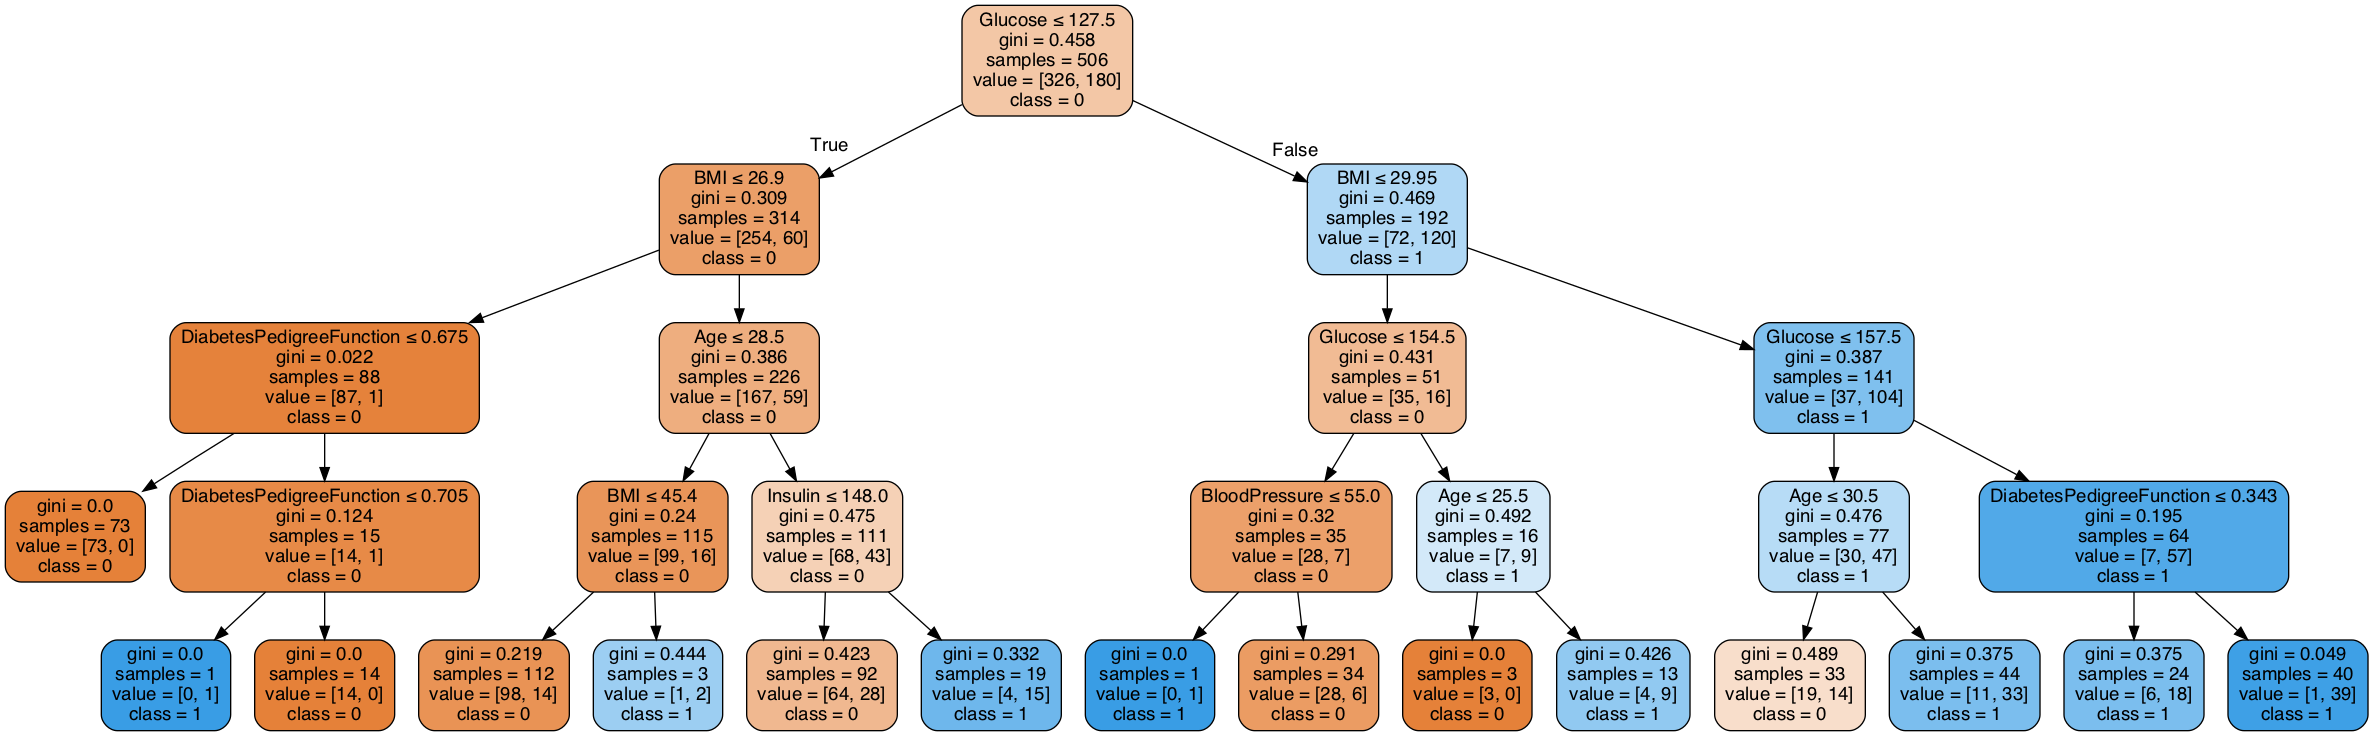

In [14]:
#Make the visual decision tree and creating a png.
d_data = StringIO()
export_graphviz(tree, out_file=d_data,
                filled=True, rounded=True,
                special_characters=True, feature_names=features,class_names=["0", "1"])
tree = pydotplus.graph_from_dot_data(d_data.getvalue())
tree.write_png("diabetes.png")
Image(tree.create_png())

# Gaussian Mixture Model

In [15]:
def trainAndPredict(data, firstColumn, secondColumn):
    gmm = GMM(n_components=2)
    gmm.fit(data)

    classes = gmm.predict(data)
    newDF = pd.DataFrame(data)
    newDF['class'] = classes
    newDF.columns = [firstColumn, secondColumn, 'class']
    return data

def plotGMM(data, title, firstColumn, secondColumn):
    plt.title(title)
    plt.xlabel(firstColumn)
    plt.ylabel(secondColumn)
    plt.scatter(data.loc[data['class'] == 0][firstColumn],data.loc[data['class'] == 0][secondColumn],color='b',label='0')
    plt.scatter(data.loc[data['class'] == 1][firstColumn],data.loc[data['class'] == 1][secondColumn],color='c',label='1')
    plt.legend()                                                                                                
    plt.show()

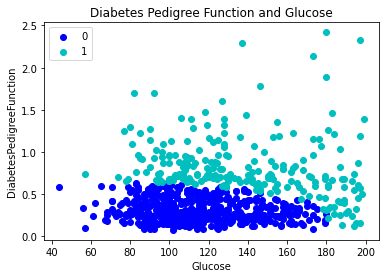

In [16]:
# Glucose and DPF
oneData = mod_df[['Glucose', 'DiabetesPedigreeFunction']].copy()
gmm = trainAndPredict(oneData, "Glucose", "DiabetesPedigreeFunction")
plotGMM(gmm, "Diabetes Pedigree Function and Glucose", "Glucose", "DiabetesPedigreeFunction")

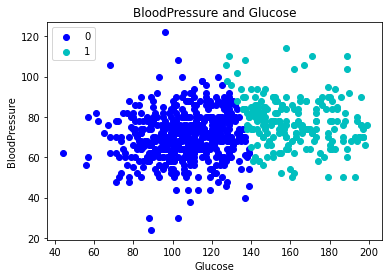

In [17]:
# Glucose and Bloodpressure
threeData = mod_df[['Glucose', 'BloodPressure']].copy()
gmm = trainAndPredict(threeData, "Glucose", "BloodPressure")
plotGMM(gmm, "BloodPressure and Glucose", "Glucose", "BloodPressure")

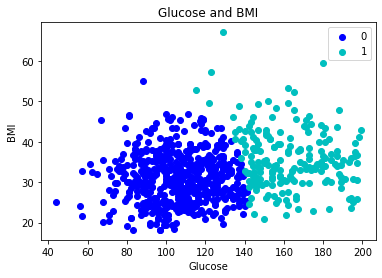

In [18]:
# Glucose and BMI
fourthData = mod_df[['Glucose', 'BMI']].copy()
gmm = trainAndPredict(fourthData, "Glucose", "BMI")
plotGMM(gmm, "Glucose and BMI", "Glucose", "BMI")